In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
folder_selected = r'D:\DataSet\MySpaces\data'
df_events = loading_from_listfolder(folder_selected,'df_events_agency_resp_phase')
epochs_phase = loading_from_listfolder(folder_selected,'epochs_phase')
condition_dict_trials = loading_from_listfolder(folder_selected,'condition_dict_trials')
folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')
    
print('Number of subjects found: ' + str(len(df_events)))

D:\DataSet\MySpaces\data\s01
D:\DataSet\MySpaces\data\s02
D:\DataSet\MySpaces\data\s03
D:\DataSet\MySpaces\data\s04
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
D:\DataSet\MySpaces\data\s01
D:\DataSet\MySpaces\data\s02
D:\DataSet\MySpaces\data\s03
D:\DataSet\MySpaces\data\s04
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MySpaces\data\s07
D:\DataSet\MySpaces\data\s08
D:\DataSet\MySpaces\data\s09
D:\DataSet\MySpaces\data\s10
D:\DataSet\MySpaces\data\s12
D:\DataSet\MySpaces\data\s13
D:\DataSet\MySpaces\data\s14
D:\DataSet\MySpaces\data\s15
D:\DataSet\MySpaces\data\s01
D:\DataSet\MySpaces\data\s02
D:\DataSet\MySpaces\data\s03
D:\DataSet\MySpaces\data\s04
D:\DataSet\MySpaces\data\s05
D:\DataSet\MySpaces\data\s06
D:\DataSet\MyS

In [3]:
index = np.where(epochs_phase[0].times == 0)[0]

phase_detection = dict()

for iEvent,event in enumerate(epochs_phase[0].event_id):
    print(event)
    for i,key in enumerate(condition_dict_trials[0].keys()):
        print(i,key)
        phase_subject = []
        for iSubject,subj_epochs in enumerate(epochs_phase):
            trials_index = condition_dict_trials[iSubject][key]
            data = np.squeeze(subj_epochs[event].get_data()).real
            phase_subject.append(data[trials_index,index])
        phase_detection.update({event+'_'+key:phase_subject})

ST_ACTION
0 SELF
1 CUE
ST_GO
0 SELF
1 CUE


ST_ACTION_SELF
(1273,)
-5.7185901973691164
ST_ACTION_CUE
(2799,)
-21.27400607472914
ST_GO_SELF
(1273,)
6.452897391726904
ST_GO_CUE
(2799,)
4.091177171599929


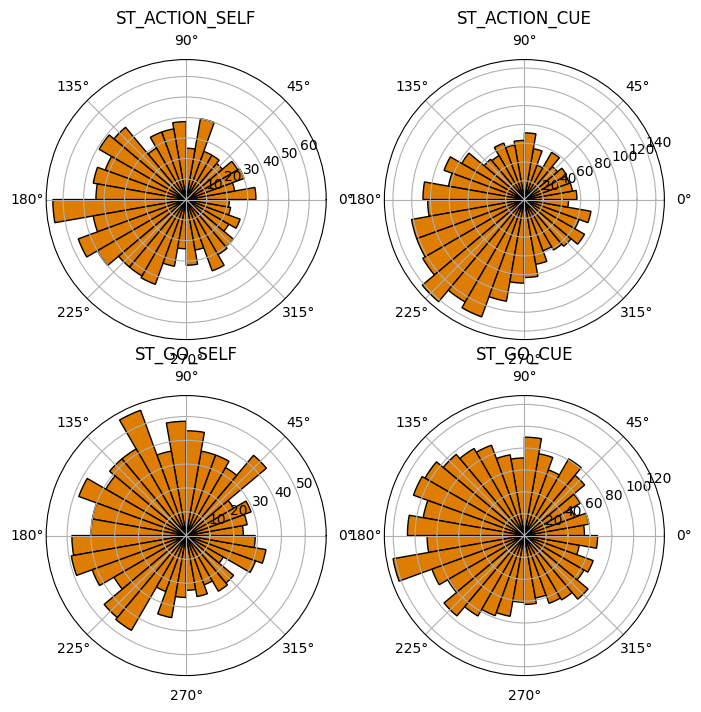

In [6]:
colormap = [0.8706,0.4902,0];

fig = plt.figure(figsize=(8, 8))
plt.style.use('default')
bin_size = 10
i = 0
for key,items in phase_detection.items():
    print(key)
    ax = fig.add_subplot(221 + i, projection='polar')
    ax.set_theta_zero_location("E")
    ax.set_title(key, y=1.1)
    radians = np.concatenate(phase_detection[key])
    print(np.shape(radians))
    degrees = np.rad2deg(radians)
    print(np.mean(degrees))
    a , b=np.histogram(degrees, bins=np.arange(-180, 180+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=colormap, edgecolor='k',label=key)
    i = i+1

# Phase coupling analysis

In [7]:
nbins = 7
bins = np.linspace(-np.pi, np.pi, nbins)
bins = np.rad2deg(bins);
diff_bins = np.round(bins[1] - bins[0])
print(int(diff_bins))
print(bins)

60
[-180. -120.  -60.    0.   60.  120.  180.]


In [8]:
GA_df_events = dict()
list_subjects_events = []
nSubjects = len(df_events)
for iEvent,event_type in enumerate(df_events[0].keys()):
    print(event_type)
    list_subjects_events = []
    list_subjects_events_conca = []
    for iSubject in range(nSubjects):
        df_events[iSubject][event_type]['subjectID'] = iSubject
        df_events[iSubject][event_type]['group'] = df_events[iSubject][event_type]['group']*int(diff_bins)
        df_events[iSubject][event_type] = df_events[iSubject][event_type]
        list_subjects_events.append(df_events[iSubject][event_type])
    list_subjects_events_conca = pd.concat(list_subjects_events)
    GA_df_events.update({event_type:list_subjects_events_conca})

ST_ACTION_SELF
ST_ACTION_CUE
ST_GO_SELF
ST_GO_CUE


ST_ACTION_SELF
ST_ACTION_CUE
ST_GO_SELF
ST_GO_CUE


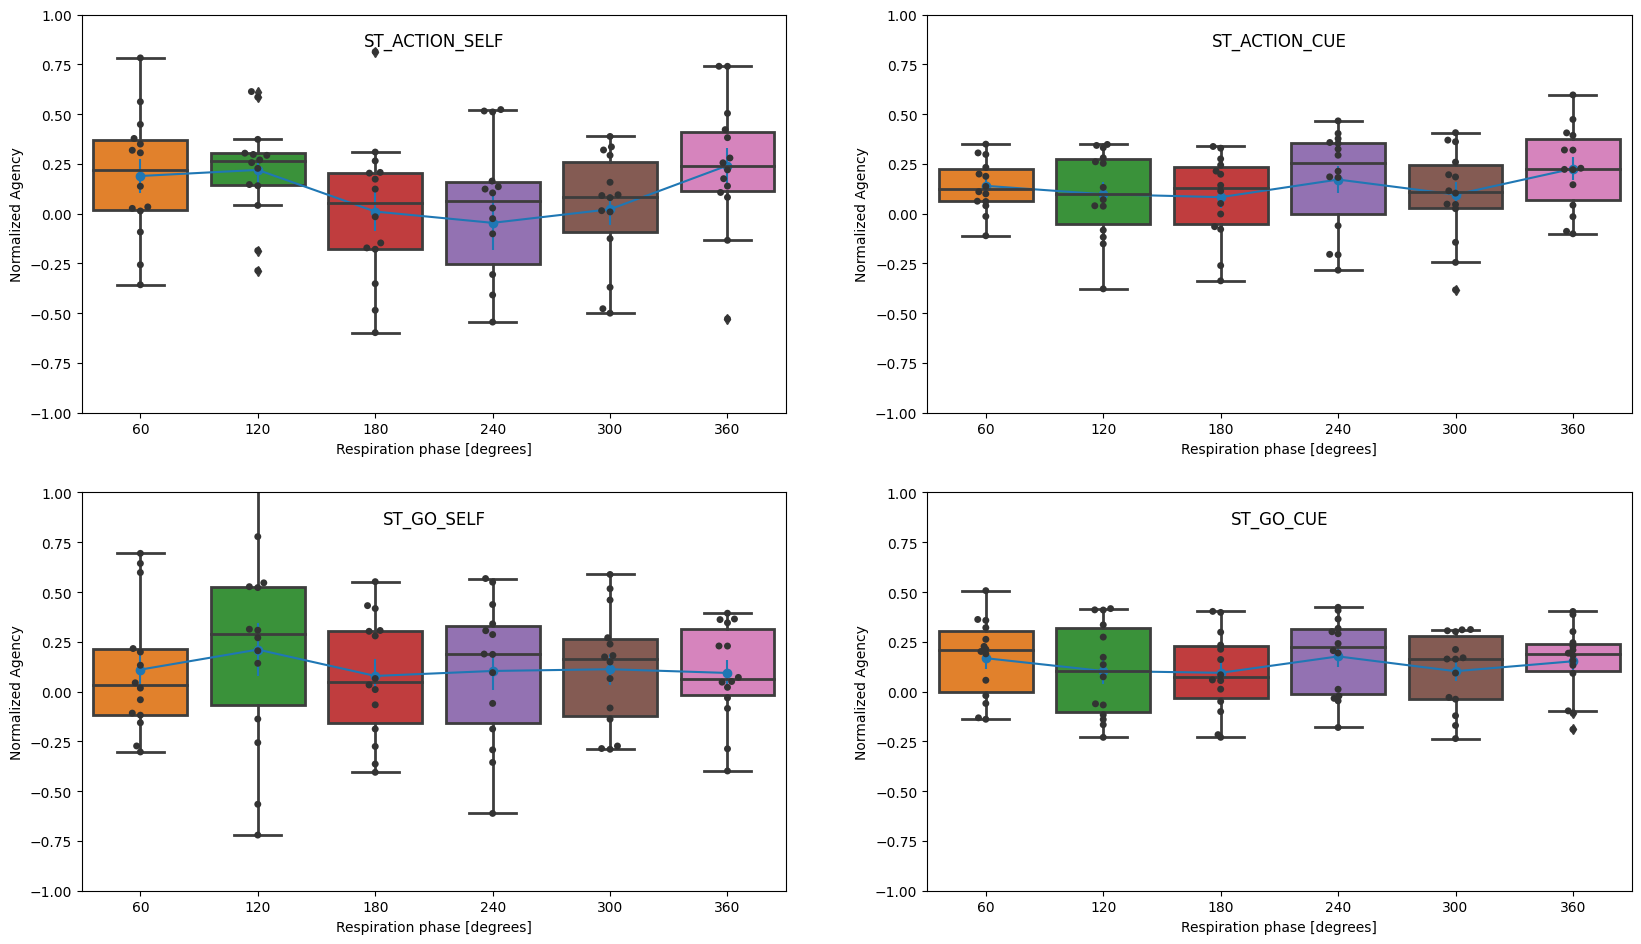

In [9]:

import seaborn as sns
import pandas as pd
import matplotlib.ticker as tck

fig = plt.figure(figsize=(20,30))    
df_new = pd.DataFrame()

for iEvent,event_type in enumerate(df_events[0].keys()):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.groupby(['group','subjectID']).mean().reset_index()
    
    mean = df_new.groupby(['group']).mean().reset_index()
    dev = df_new.groupby(['group']).sem().reset_index()
    x = mean['Agency'].to_numpy()
    yerr = dev['Agency'].to_numpy()

    
    axs=fig.add_subplot(521+iEvent)
    axs.errorbar(np.arange(nbins),x, yerr=yerr, fmt='-o') #fmt=None to plot bars only
    ax = sns.boxplot(x='group', y='Agency', data=df_new,width=0.8,linewidth=2,showfliers = True)
    ax = sns.swarmplot(x="group", y='Agency', data=df_new, color="0.2")
    ax.set_title(event_type,y=0.9)
    ax.set_xlabel("Respiration phase [degrees]")
    ax.set_ylabel("Normalized Agency")
    axs.set_xlim([0.5,(nbins)-0.5])
    axs.set_ylim([-1,1])

# path = os.path.join(folderGA,'Agency_BreathingCoupling')
# saving_figure(event_type,path,fig)

In [10]:
def transform_dataframe_2d(thisData):
    #data_original = data_original[10:,:]
    group_list = np.unique(thisData[:,0])
    subject_list = np.unique(thisData[:,1])
    nGroup,nSubject = len(group_list),len(subject_list) 
    data_2d = np.zeros((nSubject,nGroup))
    for i,group in enumerate(group_list):
        index = np.where(thisData[:,0] == group)
        data_2d[:,i] = thisData[index,2]
    return data_2d

def compute_modulation_index(thisDataSubject):
    K = np.log(nbins)
    thisDataSubject = min_max_normalization(thisDataSubject)
    ratio = thisDataSubject / np.sum(thisDataSubject)
    MI=(K-(-np.nansum(ratio*np.log(ratio))))/K
    return MI

def min_max_normalization(data):
    mini,maxi = np.min(data),np.max(data)
    data = (data - np.min(data))/(np.max(data)-np.min(data))
    return data

In [11]:
GA_MI = dict()
data_original = []
for iEvent,event_type in enumerate(GA_df_events.keys()):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.copy().dropna()
    df2 = df_new.groupby(['group','subjectID']).mean().reset_index()
    data_av = df2.to_numpy() 
    data_2d = transform_dataframe_2d(data_av)
    MI_real = np.zeros((nSubjects))
    for iSubject in range(nSubjects):
        thisDataSubject = data_2d[iSubject,:]
        MI_real[iSubject] = compute_modulation_index(thisDataSubject)
    GA_MI.update({event_type:np.mean(MI_real)})
    print('GA_MI =' + str(GA_MI[event_type]))
    del df_new, df

ST_ACTION_SELF
GA_MI =0.23330631935034427
ST_ACTION_CUE
GA_MI =0.25648696799599746
ST_GO_SELF
GA_MI =0.2858075739137365
ST_GO_CUE
GA_MI =0.267299049222588


In [ ]:
GA_MI_surrogate_event = dict()
nPermutation = 1000
df_new = []
for iEvent,event_type in enumerate(GA_df_events.keys()):
    print(event_type)
    df = GA_df_events[event_type]
    df_new = df.copy().dropna()
    GA_MI_surrogate = np.zeros(nPermutation)
    for iPermutation in range(nPermutation):
        MI_surrogate = np.zeros((nSubjects))
        for iSubject in range(nSubjects):
            df_subject = df_new.copy()
            df_subject = df_subject[(df_subject["subjectID"] == iSubject)]  
            data_original = df_new.to_numpy()[:,0:2]
            nsamples = np.shape(data_original)[0]
            perm = np.random.permutation(nsamples)
            data_surrogate = data_original
            data_surrogate[:,1] = data_original[perm,1]
            perm_data = pd.DataFrame(data_surrogate,columns=['group','Power'])
            data_surrogate = perm_data.groupby(['group']).mean().reset_index().to_numpy()[:,1]
            MI_surrogate[iSubject] = compute_modulation_index(data_surrogate)
            del df_subject
        GA_MI_surrogate[iPermutation] = np.mean(MI_surrogate)
    index = GA_MI_surrogate > GA_MI[event_type]
    pval = np.sum(index)/float(nPermutation)
    print(pval)
    GA_MI_surrogate_event.update({event_type:GA_MI_surrogate})
print('Finished')

ST_ACTION_SELF
0.871
ST_ACTION_CUE
0.343
ST_GO_SELF


self
0.6
cue
0.040000000000000036


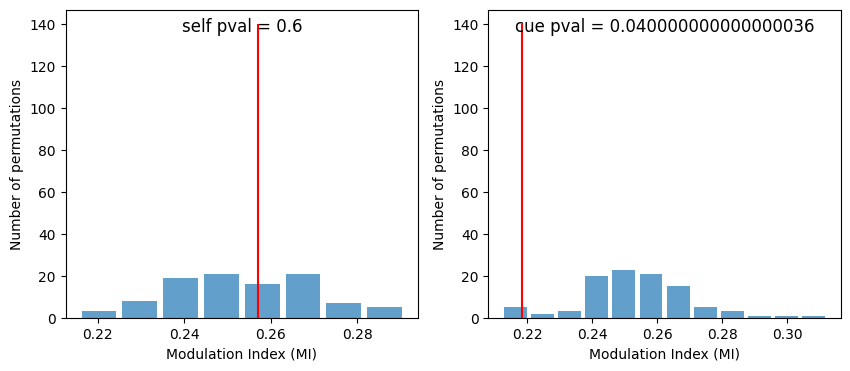

In [14]:
fig, axs = plt.subplots(1, 2,figsize=(10,4))

axs = axs.ravel()

for iEvent,event_type in enumerate(GA_df_events.keys()):
    print(event_type)
    axs[iEvent].hist(x=GA_MI_surrogate_event[event_type], bins='auto',alpha=0.7, rwidth=0.85)
    axs[iEvent].set_xlabel('Modulation Index (MI)')
    axs[iEvent].set_ylabel('Number of permutations') 
    axs[iEvent].set_title('Histogram')
    axs[iEvent].vlines(GA_MI[event_type],0, 140, colors='r')
    index = GA_MI_surrogate_event[event_type] > GA_MI[event_type]
    pval = 1-np.sum(index)/float(nPermutation)
    print(pval)
    axs[iEvent].set_title(event_type + " " + "pval = " + str(pval),y=0.9)
fig.show()

path = os.path.join(folderGA,'Phase_coupling_Agency')
# event_type = "Permutation_test" 
# saving_figure(event_type,path,fig)